# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<h1>Содержание</h1>
<li><span><a href="#Изучение-данных-и-предобработка" data-toc-modified-id="Изучение-данных-и-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и предобработка</a></span></li>
<li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li>
<li><span><a href="#Портрет-пользователя-для-каждого-региона" data-toc-modified-id="Портрет-пользователя-для-каждого-региона-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Портрет пользователя для каждого региона</a></span></li>
<li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li></ul></div>
<li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных и предобработка
[Содержание](#Содержание)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Что мы видим из проблем.

В названиях столбцов есть буквы в верхнем регистре, от этого нам надо будет избавиться.

В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating есть пропуски, их мы проанализируем отдельно для каждого столбца.

---
Изменим написание названий столбцов на нижний регистр:

In [3]:
df.columns = df.columns.str.lower()

---
Взглянем на пропуски в столбце name, благо их всего два.

In [4]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Оказывается в этих же строках находятся оба пропуска в столбце genre.  
Выглядит так, будто это одна и та же игра в двух версиях, для японского рынка и для всего остального мира. На это намекают совпадающие платформа, год выпуска, и значения в столбцах продаж. К сожалению, на Sega Genesis, она же Sega Mega Drive в 1993 году выходило очень много игр, итак что пропуски в названии мы восстановить не сможем, так что удалим эти 2 строки

In [5]:
df = df.drop(index=[659, 14244])

---
Посмотрим на то, какие у нас есть платформы и сколько на них игр.

In [6]:
df['platform'].value_counts(dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Есть несколько малопопулярных платформ, которые однако имели место быть (3DO даже была у меня в детстве). Мы их оставим, нам они не помешают.

---
Проанализируем пропуски в годах выпуска.

In [7]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
len(df[df['year_of_release'].isna()]) / len(df)

0.016095255190570215

В целом, их не так уж и много, всего около полутора процентов от всего датасета. Однако дата выхода будет очень важна для выбора актуального преиода, так что избавимся от них, а столбец приведем к целочисленному типу.

In [9]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

---
Посмотрим, сколько у нас иг по жанрам. От двух пропусков в этом столбце мы уже избавились.

In [10]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Ничего необычного. Разве что жанр Misc немного смущает. обычно так отмечают  всё, что не попало в остальные категории. Тут могут быть довольно разные игры. Но других данных у нас нет, так что оставим этот жанр как есть.

---
Имея столбцы продаж по регионам, добавим столбец суммарных продаж каждой игры во всех регионах.

In [11]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

---
Изучим оценки критиков.  
Оценка критиков есть только у половины игр в датасете. Отсутствие рейтинга у игры обычно означает, либо что или игра не очень популярная, нишевая, или что на момент выгрузки оценка еще не проставлена. Попробуем проверить теорию о том, что игры без рейтинга в нашем датасете не очень популярны, воспользуемся для этого столбцом с сумарными продажами.

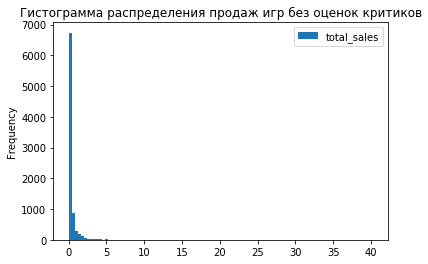

In [12]:
df[df['critic_score'].isna()].plot(y='total_sales', title='Гистограмма распределения продаж игр без оценок критиков', kind='hist', bins=100)

Большая часть таких игр действительно не очень хорошо продалась, хотя есть и игра (игры) с продажами в 40 миллионов копий по всему миру.

---
Теперь взглянем на оценки игроков.  
Таких оценок больше, чем оценок игровых журналистов и критиков. Это логично, простых игроков гораздо больше, а значит гораздо больше шансов, что в какую-то редкую и не очень популярную игру кто-то сыграет и поставит ей оценку.  
Аббревиатура tbd в оценках пользователей означает to be determined, это означает или что пользовательских оценок нет вовсе, или что их слишком мало, и итоговая оценка может быть "перекошена" в ту или иную сторону. В нашем случае такая оценка аналогична пропуску. Можно было бы оставить как есть, но tbd не дает нам проводить математические операции над столбцом, в отличие от nan, поэтому мы заменим tbd на nan, создадим пропуски, чтобы иметь возможность обрабатывать столбец с рейтингом. После этого приведем столбец к численнорму типу.

In [13]:
df.loc[df[df['user_score'] == 'tbd'].index, 'user_score'] = np.nan

In [14]:
df['user_score'] = df['user_score'].astype('float64')

---
Посмотрим, какие возрастные рейтинги есть в датасете.

In [15]:
df['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Больше трети датасета пропусков. С ними придется смириться, восстановить или посчитать рейтинг мы никак не можем. Отсутствовать рейтинг опять же может из-за того, что игра не очень популярная.

Проанализируем распределение продаж игр без возрастных рейтингов.

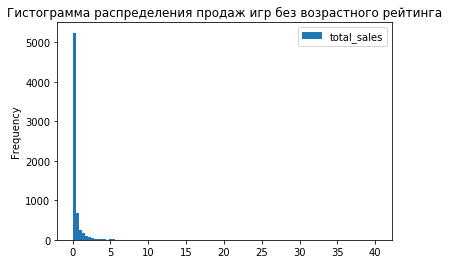

In [16]:
df[df['rating'].isna()].plot(y='total_sales', title='Гистограмма распределения продаж игр без возрастного рейтинга', kind='hist', bins=100)

Оказывается, основная масса таких игр не очень кассовая/популярная.

Кроме пропусков у игр в датасете есть следующие рейтинги:

* E — Everyone, Для всех
* T — Teen, Для подростков
* M — Mature 17+, Для взрослых
* E10+ — Everyone 10+, Для всех от 10 лет и старше
* EC — Early Childhood, Для детей младшего возраста
* K-A — Kids to Adults, От детей до взрослых
* RP — Rating Pending, Рейтинг ожидается
* AO — Adults Only 18+, Только для взрослых

Мы не можем проверить правильно ли указан каждый конкретный рейтинг, так что примем их как есть. Однако, некоторые рейтинги использованы очень мало раз, взглянем на них поближе.

---
На весь датасет у нас всего одна игра с рейтингом AO - Adults Only. Взглянем, что это за игра:

In [17]:
df[df['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO,1.96


Это версия Grand Theft Auto: San Andreas для самого первого XBox. Посмотрим на версии этой игры для других платформ.

In [18]:
df[df['name'] == 'Grand Theft Auto: San Andreas']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO,1.96
2115,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93.0,8.9,M,0.97
10311,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,NaN,7.5,M,0.11


Изначальный рейтинг игры был M - Mature. Рейтинг AO  появился у этой игры после появлния спорной модификации Hot Coffee, которая разблокировала деактивированный, но оставленный разработчиками в ресурсах игры контент для взрослых. После появления модификации, на издателя игры Rockstar North обрушился шквал критики, а ESRB изменила оценку игры с  M на AO. Такой рейтинг накладывал очень строгие ограничения на распространение игры, например, она могла продаваться только в специализированных магазинах для взрослых. Игра ставилась в один ряд с порнографией.  
Издатель отозвал из продажи все копии игры с контентом для взрослых, а через некоторое время выпустил официальный патч, удаляющий этот контент из ресурсов уже установленной игры. После этого рейтинг был смягчен.  
Поэтому считаю данный рейтинг в нашем датасете ошибочным. Изменим его на M, как у других версий игры.

In [19]:
df.loc[875, 'rating'] = 'M'

---
Следующим разберем RP - Rating Pending. Эта отметка означает, что игра еще не была оценена ESRB, обычно такая отметка ставится на пре-релизныйх рекламных материалах. Посмотрим, что это за игры.

In [20]:
df[df['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP,0.04


Всего одна игра, очень маленькие продажи. Мы без особых сожалений можем удалить её, это не сильно повлияют на наш анализ.

In [21]:
df = df.drop(index=df[df['rating'] == 'RP'].index)

---
Следующим разберем  'K–A' - Kids to Adults. Это устаревший рейтинг, который в 1998 году был заменен рейтингом E. Так же поступим и мы.

In [22]:
df[df['rating'] == 'K-A']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A,2.40
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A,1.91
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,0.01


In [23]:
df.loc[df[df['rating'] == 'K-A'].index, 'rating'] = 'E'

---
И наконец EC - Early Childhood, игры для малышей, развивающие, обущающие игры. Тоже на настоящий момент устаревшая маркировка. От нее было решено отказаться в 2018 году из-за того, что так маркировалось очень малое количество проектов. Вот и в нашем датасете игры с таким рейтингом составляют менее 0,05 процента. Я считаю, что мы можем безопасно объеденить ее с E.

In [24]:
df[df['rating'] == 'EC']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4297,Nickelodeon Team Umizoomi,DS,2011,Action,0.42,0.00,0.0,0.03,NaN,NaN,EC,0.45
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010,Misc,0.35,0.00,0.0,0.02,NaN,NaN,EC,0.37
6046,Sesame Street: Cookie's Counting Carnival,Wii,2010,Misc,0.27,0.00,0.0,0.02,NaN,NaN,EC,0.29
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,0.12,0.09,0.0,0.03,NaN,7.0,EC,0.24
7586,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009,Misc,0.19,0.00,0.0,0.01,NaN,NaN,EC,0.20
9960,Dora the Explorer: Journey to the Purple Planet,GC,2005,Adventure,0.09,0.02,0.0,0.00,NaN,NaN,EC,0.11
13065,Sesame Street: Cookie's Counting Carnival,PC,2010,Misc,0.05,0.00,0.0,0.00,NaN,NaN,EC,0.05
13455,Sesame Street: Elmo's A-to-Zoo Adventure,PC,2010,Misc,0.04,0.00,0.0,0.00,NaN,NaN,EC,0.04


In [25]:
df.loc[df[df['rating'] == 'EC'].index, 'rating'] = 'E'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
name               16443 non-null object
platform           16443 non-null object
year_of_release    16443 non-null int64
genre              16443 non-null object
na_sales           16443 non-null float64
eu_sales           16443 non-null float64
jp_sales           16443 non-null float64
other_sales        16443 non-null float64
critic_score       7982 non-null float64
user_score         7462 non-null float64
rating             9767 non-null object
total_sales        16443 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.3+ MB


## Анализ данных
[Содержание](#Содержание)

Посмотрим, сколько игр выпускалось в разные годы.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text xticklabel objects>)

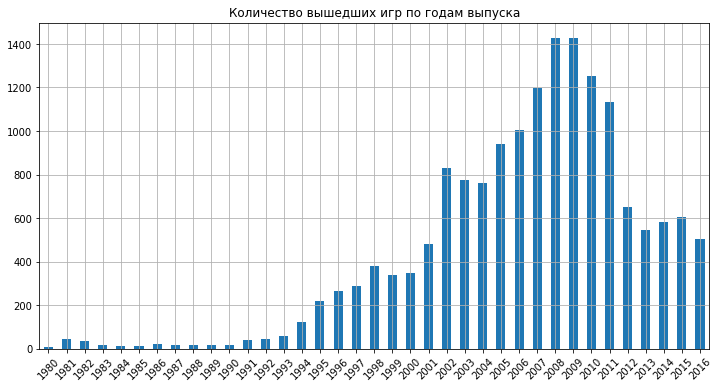

In [27]:
df['year_of_release'].value_counts().sort_index().plot(title='Количество вышедших игр по годам выпуска', kind='bar', grid=True, figsize=(12, 6))
plt.xticks(rotation=45)

Игорвая индустрия начала активно расти в 90-х годах. В 00-х рост продолжился. Я затрудняюсь предположить, почему по данному датасету во второй половине 10-х годов произошел такой спад. Это может быть сокращение числа доступных платформ, кризис 2008 года. А может быть и вовсе особенность данных, например данные не полные.

Для магазина не важна история индустрии. При всем желании, магазин не сможет продавать игры восьмидесятых-девяностых годов на ставшие уже антикварными платформы. Нам имеет смысл рассматривать игры, вышедшие 1-3 года назад. Это игры на актуальные платформы, эти игры всё ещё могут заинтересовать пользователей. А кроме того, эти игры адекватнее демонстрируют картину на рынке: какие жанры покупают, о чем говорят оценки пользователей и критиков, и т.д.

---
Посчитаем суммарные продажи по каждой платформе и отсортируем их по убыванию. Возьмем 10 платформ с максимальным количеством продаж.

In [28]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Что интересно, в этот список не попала самая последняя на тот момент игровая консоль от Microsoft — Xbox One. По данным этого датасета на момент его выгрузки, эта актуальная и продолжающая набирать популярность консоль не догнала по продажам игр даже вышедшие в начале нулевых Sony PlayStation (PS) Game Boy Advance (GBA). Разумеется, как представители магазина, мы не будем пытаться продавать игры на платформы 15-летней давности, нам важны актуальные платформы с растущим количеством пользователей.

Построим графики продаж игр по десяти наиболее прибыльным платформам.

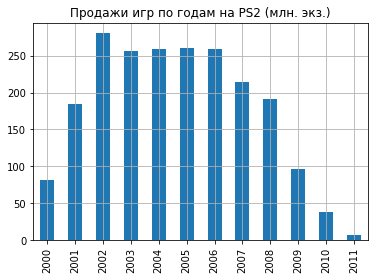

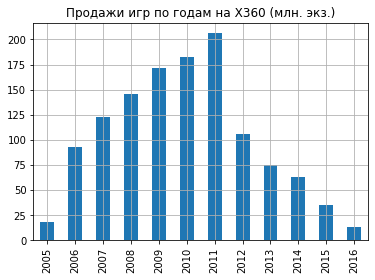

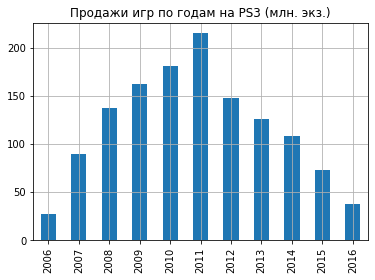

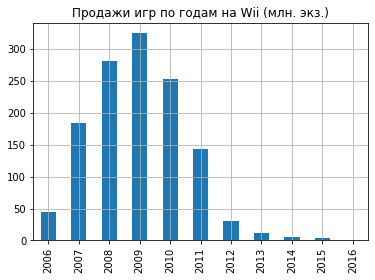

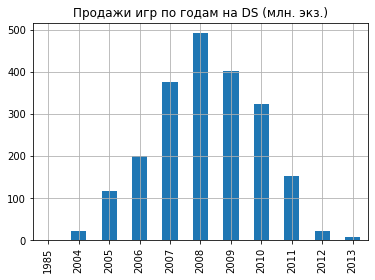

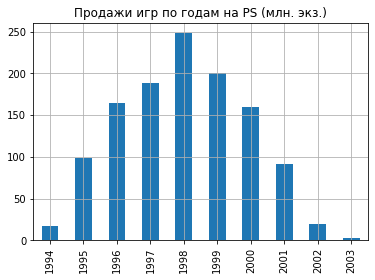

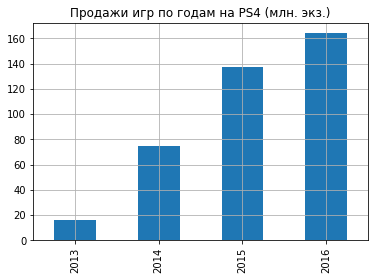

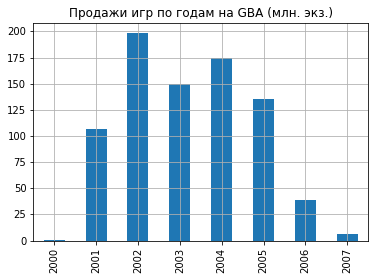

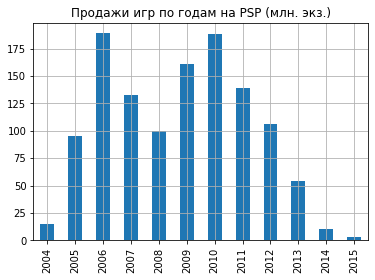

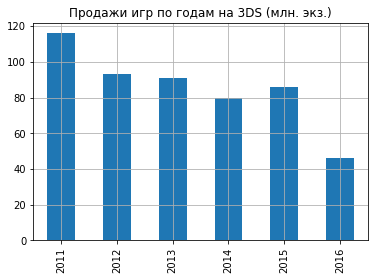

In [29]:
best_selling_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).index
for platform in best_selling_platforms:
    df[df['platform'] == platform]['year_of_release'].value_counts().sort_index().plot(title='Продажи игр по годам на '+platform+' (млн. экз.)', kind='bar', grid=True)
    plt.show()

Почти все графики выглядят как горка - сначала подъем, затем спад. Года подъема и спада и есть начало и конец цикла жизни платформы. Судя по десяти наиболее прибыльным платформам, срок жизни платформы 8-10 лет. Из десяти графиков необычно ведут себя только графики Wii, DS, PS4, 3DS. Но и тут все странности легко объяснимы.

Популярность Wii начала снижаться в связи с выходом следуюущей домашней консоли от Nintendo — WiiU. Однако у Nintendo довольно верные фанаты, поэтому игры продалжают продаваться и в последующие года, хоть и гораздо в меньших объемах. Отсюда и "хвост" на графике.

Nintendo DS вышла в 2004 году, когда и начался рост продаж. Проверим, откуда на графике возникли данные за 1985 год.

In [30]:
df[(df['platform'] == 'DS') & (df['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Тут ошибка или в платформе или в годе выпуска. Но не смотря на этот артефакт, остальной график информативен и правдив.

Отсутствие спада на графике PS4 объясняется тем, что консоль вышла только в 2013 году и еще не достигла пика своей популярности.

Ситуация с Nintendo 3DS самая интересная. Традиционно игровые консоли выпускаются в конце года, перед праздничным новогодне-рождественским сезоном. От того в первый год существования консоли продажи игр не велики. Однако Nintendo 3DS была выпущена в феврале-марте 2011 года. Поэтому к концу 2011 года приставка успела набрать продаж. От того и график продаж на ней не начинается с "подъема в горку".

---
Исходя из всего этого, я считаю, что актуальным периодом нужно взять 3 предыдущих года (2014, 2015 и 2016). На таком промежутке видно, набирает ли платформа популярность, находится на пике своей популярности или же отживает последние годы.

Создадим новый датасет, в который войдут данные за три последних года.

In [31]:
df_new = df[df['year_of_release'] >= 2014]

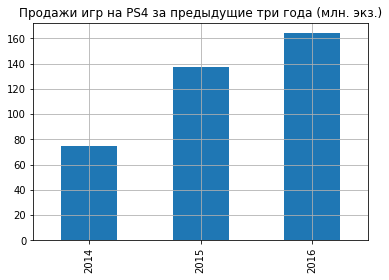

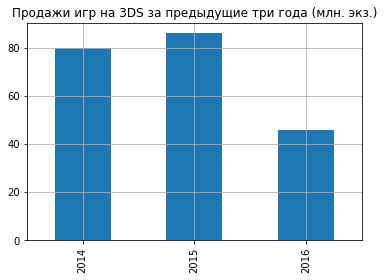

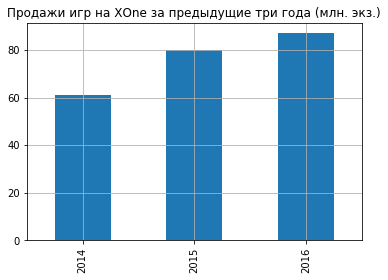

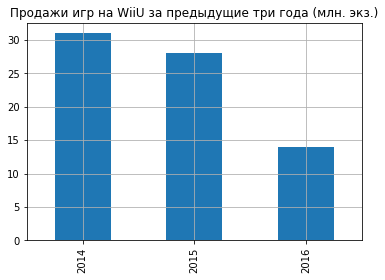

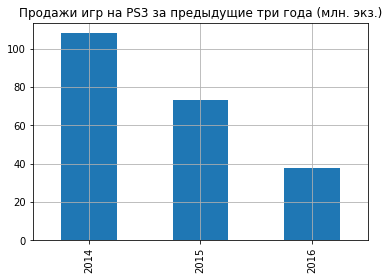

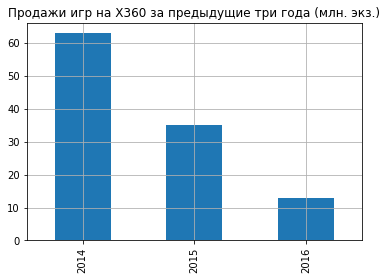

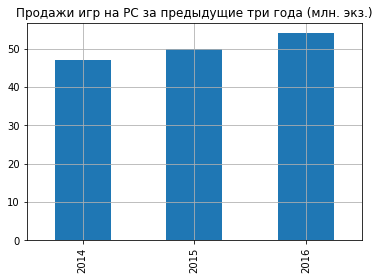

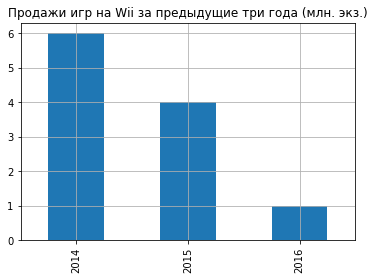

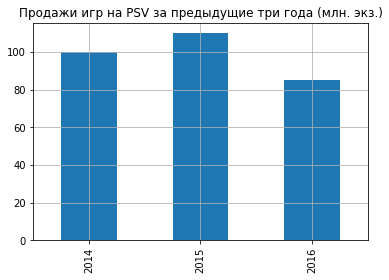

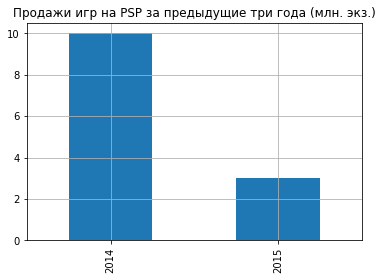

In [32]:
platforms = df_new['platform'].unique()
for platform in platforms:
    df_new[df_new['platform'] == platform]['year_of_release'].value_counts().sort_index().plot(title='Продажи игр на '+platform+' за предыдущие три года (млн. экз.)', kind='bar', grid=True)
    plt.show()

Потенциально прибыльные платформы это те, продажи у которых в последние три года растут или как мининимум не перешли в этап снижения.

Исходя из этого, потенциально прибыльные платформы:
* PS4 (Sony PlayStation 4)
* PSV (Sony PlayStation Vita)
* XONE (Microsoft Xbox One)
* 3DS (Nintendo 3DS)
* PC

Кроме того, все эти платформы (кроме очевидной PC) являются самыми актуальными у своих производителей.

---
Создадим список популярных платформ и в цикле построим графики распределения продаж на каждой платформе.

(0, 3.5)

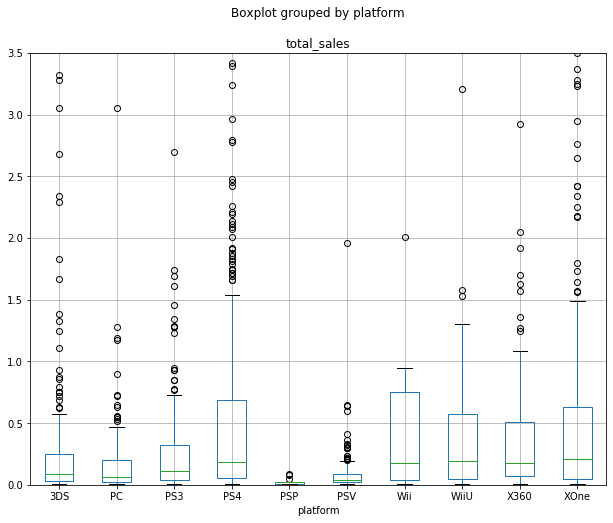

In [39]:
dimport warnings
warnings.filterwarnings('ignore')

df_new.boxplot('total_sales', by='platform', figsize=(10,8))

plt.ylim(0,3.5)

На всех платформах одна и та же картина. Большинство игр продаются в области среднего, но на каждой платформе есть игры, которые продаются значительно лучше остальных, хиты, ААА-игры.  
При чем на почти всех выбранных нами потенциально прибыльных платформах (PS4, PC, XONE, 3DS) эти игры продаются на столько лучше, что среднее значение продаж отличается от медианного в 2-4 раза.

---
Посмотрим, что за игры так хорошо продаются. Для этого возьмем игры, продавшиеся лучше 99 % всех остальных игр в датасете.

In [36]:
 df_new['total_sales'].describe(percentiles = [.01, .05, .25, .5, .75, .95, .99])

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
1%          0.010000
5%          0.010000
25%         0.030000
50%         0.100000
75%         0.350000
95%         1.916000
99%         5.261200
max        14.630000
Name: total_sales, dtype: float64

In [37]:
top_sales = df_new[df_new['total_sales'] > 5.2]
top_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Проанализируем средние значения оценок критиков и пользователей, а так же возрастной рейтинг этих игр, к каким жанрам они относятся и на каких плтформах представлены.

In [38]:
top_sales['platform'].value_counts()

PS4     10
XOne     3
3DS      3
WiiU     1
PS3      1
Name: platform, dtype: int64

In [39]:
top_sales['genre'].value_counts()

Shooter         7
Sports          3
Role-Playing    3
Action          2
Misc            1
Racing          1
Fighting        1
Name: genre, dtype: int64

In [40]:
top_sales['critic_score'].mean()

86.45454545454545

In [41]:
top_sales['user_score'].mean()

6.536363636363637

In [42]:
top_sales['rating'].value_counts()

M    5
E    4
T    2
Name: rating, dtype: int64

Получается, самые продаваемые игры это преимущественно игры, выходящие на PS4, в жанре Shooter, для возрастной категории M — Mature 17+. В среднем эти игры имеют достаточно хороший рейтинг у критиков, но посредственный рейтинг у игроков.

---
В цикле для каждой платформы проанализируем корреляцию между продажами игр и оценками критиков и пользователей. Кроме того построим диаграммы рассеяния по этим параметрам.

Корреляция между оценками пользователей и продажами на PS4 равна: -0.04
Корреляция между оценками критиков и продажами на PS4 равна: 0.40


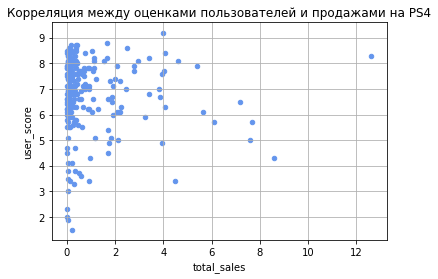

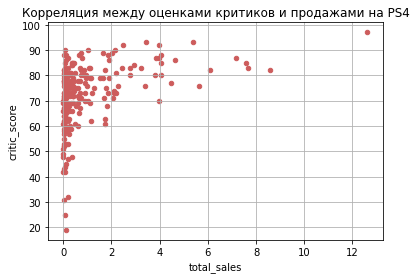

Корреляция между оценками пользователей и продажами на PSV равна: -0.17
Корреляция между оценками критиков и продажами на PSV равна: 0.04


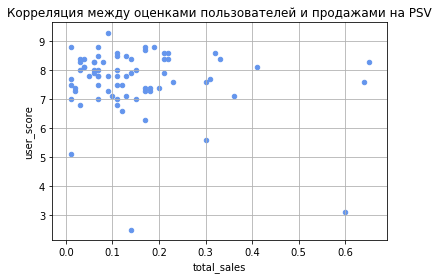

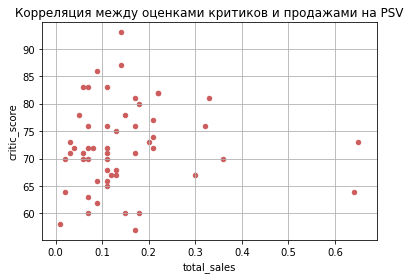

Корреляция между оценками пользователей и продажами на XOne равна: -0.07
Корреляция между оценками критиков и продажами на XOne равна: 0.43


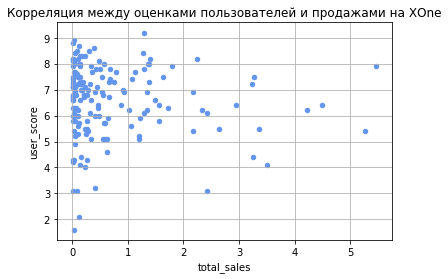

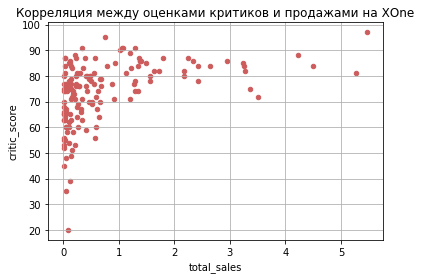

Корреляция между оценками пользователей и продажами на 3DS равна: 0.22
Корреляция между оценками критиков и продажами на 3DS равна: 0.31


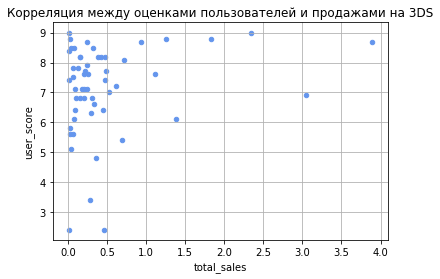

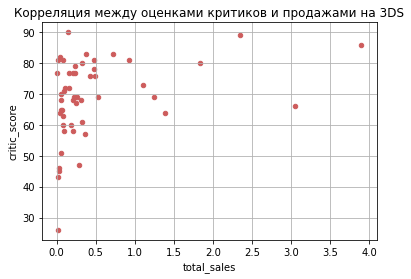

Корреляция между оценками пользователей и продажами на PC равна: -0.07
Корреляция между оценками критиков и продажами на PC равна: 0.17


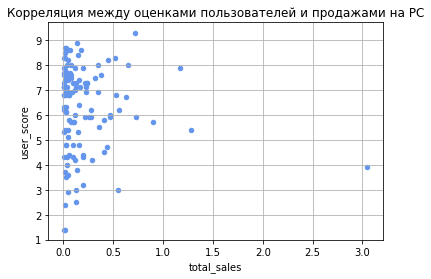

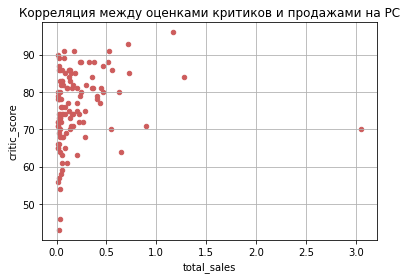

In [43]:
for platform in pop_platforms:   
    df_new[df_new['platform'] == platform].plot(y='user_score', x='total_sales', title='Корреляция между оценками пользователей и продажами на '+platform, kind='scatter', grid=True, color='cornflowerblue')
    df_new[df_new['platform'] == platform].plot(y='critic_score', x='total_sales', title='Корреляция между оценками критиков и продажами на '+platform, kind='scatter', grid=True, color='indianred')
    print('Корреляция между оценками пользователей и продажами на '+platform+' равна: {:.2f}'.format(df_new[df_new['platform'] == platform]['user_score'].corr(df_new[df_new['platform'] == platform]['total_sales'])))
    print('Корреляция между оценками критиков и продажами на '+platform+' равна: {:.2f}'.format(df_new[df_new['platform'] == platform]['critic_score'].corr(df_new[df_new['platform'] == platform]['total_sales'])))
    plt.show()

Корреляции между продажами и оценками критиков или пользователей слабая, а часто её нет вовсе. Честно говоря, мне это показалось странным.

Если низкую корреляцию продаж и отзывов критиков я бы мог объяснить купленными отзывами, то низкая корреляция продаж и оценок пользователей очень неожиданна. Пользователи в первую очередь голосуют своим кошельком и оценки, как мне казалось, должны соответствовать.

Можно было бы предположить, что у издателей игр очень хорошо работают маркетологи, которые обеспечивают хорошие продажи, а потом пользователи разочаровываются в купленных играх. Однако, на горизонте трех лет, который мы выбрали, эффект хороших стартовых продаж должен выравниваться.

---
Посмотрим, какие жанры являются наиболее и наименее прибыльными.

In [44]:
genres_sales = df_new.pivot_table(index='genre',
                                  values='total_sales',
                                  aggfunc='sum').sort_values(by='total_sales', ascending=False)
genres_sales

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Три самых прибыльных жарна это Action, Shooter, Sports.  
При чем жарн Action лидирует в том числе и потому, что является по сути собирательным для многих поджанров. Иногда в поджанры Action даже относят такие вполне самостоятельные и популярные жанры как Shooter, Fighting.  
Игры жанра Sports выпускаются по лицензиям, в них используются внешности популярных спортсменов, названия реальных команд, да и сам по себе спорт вполне популярен.  
Ну, а жанр Shooter популярен за счет своей иммерсивности с момента появления.

В аутсайдерах жанры Simulation, Strategy и Puzzle. 

In [45]:
genres_sales_mm = df_new.pivot_table(index='genre',
                                  values='total_sales',
                                  aggfunc=['mean','median'])
genres_sales_mm

,mean,median
,total_sales,total_sales
genre,,
Action,0.322068,0.090
Adventure,0.094865,0.030
Fighting,0.470333,0.125
Misc,0.332301,0.090
Platform,0.476053,0.140
Puzzle,0.157857,0.045
Racing,0.398841,0.090
Role-Playing,0.459005,0.110


In [46]:
genres_sales_mm.corr()

,,mean,median
,,total_sales,total_sales
mean,total_sales,1.000000,0.971443
median,total_sales,0.971443,1.000000


## Портрет пользователя для каждого региона
[Содержание](#Содержание)

Опишем портрет среднего пользователя каждого региона (NA — Северная Америка, EU — Европа, JP — Япония).

Для этого в цикле подсчитаем следующие датасеты:

* какую долю всех продаж в регионе занимает пять самых популярных платформ 
* продажи по пяти самым популярным жанрам в регионе
* продажи в каждом регионе в зависимости от рейтинга

In [47]:
df_new = df_new.fillna({'rating':'NO DATA'})

In [48]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

In [49]:
for reg in regions:
    pl_sum = df_new.pivot_table(index='platform', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False).head(5)
    pl_sum['part'] = (pl_sum[reg] / df_new.pivot_table(index='platform', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False)[reg].sum())
    print(pl_sum.drop(columns=reg))
    print(df_new.pivot_table(index='genre', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False).head(5))
    print(df_new.pivot_table(index='rating', values=reg, aggfunc='sum').sort_values(by=reg, ascending=False))
    print('----------------')

              part
platform          
PS4       0.347145
XOne      0.286102
X360      0.099627
3DS       0.079701
PS3       0.077624
              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
         na_sales
rating           
M           96.42
NO DATA     64.72
E           50.74
T           38.95
E10+        33.23
----------------
              part
platform          
PS4       0.480420
XOne      0.170866
PS3       0.094355
PC        0.066388
3DS       0.059554
              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
         eu_sales
rating           
M           93.44
NO DATA     58.95
E           58.06
T           34.07
E10+        26.16
----------------
              part
platform          
3DS       0.475239
PS4       0.161349
PSV       0.156193
PS3       0.120529
WiiU      0.

Игры с пропусками в возрастных рейтингах на очень высоких позициях по продажам. Таких игр много в каждом регионе. Значительное количество игр не получает возрастных рейтингов. Кроме того, картина в Северной Америке и Европе одинаковая.
    
Но на общем фоне выделяется японский рынок, где игр без возрастного рейтинга больше половины. Это происходит из-за того, что ESRB — североамериканская организация, и локальные японские игры очень часто не получают возрастных рейтингов. И кроме того, возрастные рейтинги ESRB не сильно влияют на распространение игр в Японии.

Теперь по этим данным опишем портреты пользователей каждого региона:

<b>Пользователи региона NA — Северная Америка.</b>

* В регионе активно борются две самые актуальные на тот момент платформы Xbox One и PS4. PS4 лидирует, но перевес не большой. Консоли прошлого поколения Xbox 360 и PS3 постепенно теряют свои позиции.
* У среднего пользователя региона почти с двукратным отрывом лидируют игры жанров Shooter и Action. Предпочтения в жанрах похожи на средние по всему датасету.
* Пользователи предпочитают игры возрастной категории M — Mature 17+.

<b>Пользователи региона EU — Европа.</b>

* PS4 в этом регионе почти троекратно опережает Xbox One. Кроме того, консоль Microsoft прошлого поколения вообще не попала в пятерку. Вместо нее в пятерке лидеров PC.
* Касательно жанров, предпочтения игроков данного региона в целом тоже соответствуют общемировным.
* По возрастному рейтингу игроки региона так же предпочитают игры для взрослых, возрастной категории M — Mature 17+.

<b>Пользователи региона EU — Европа.</b>

* В отличие от всего мира, на японском рынке лидируют японские консоли. Платформы американцев из Microsoft вообще не попали в пятерку. Кроме того, в пятерке целых две платформы - портативные консоли. А 3DS и вовсе лидирует с огромным отрывом.
* Жанровые предпочтения тоже заметно отличаются. В лидерах тут Role-Playing, при чем, если бы мы делали более подробный анализ, я уверен, что лидировали бы именно JRPG - японские ролевые игры, имеющие свои характерные отличия. Кроме того, в отличие от других регионов, в японии в пятерку популярных попал жанр Fighting, что не удивительно, для жанра, там и зародившегося.
* Не смотря на популярность игр про единоборства и мордобой, в регионе лидируют по продажам игры для подростковой возрастной категории T — Teen.

## Проверка гипотез
[Содержание](#Содержание)

Проверим две гипотезы:

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез мы будем использовать оригинальный датасет df.

Гипотезы сформулируем таким образом, чтобы нулевая гипотеза заявляла о равенстве двух параметров, а альтернативная о неравенстве.

Не смотря на то, что датасет у нас один, проверяемые выборки независимы, имеют разные размеры, поэтому будем использовать метод ttest_ind.

Значение alpha возьмем 0,05.

Проверим первую гипотезу.  
Нулевая гипотеза звучит так: "<b>средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>".  
Альтернативная гипотеза будет звучать так: "<b>средние пользовательские рейтинги платформ Xbox One и PC различны</b>".

In [50]:
print('Пользовательские оценки игр на Xbox One')
print()
print('Среднее значение:', df_new[df_new['platform'] == 'XOne']['user_score'].mean(skipna=True))
print('Дисперсия:', np.var(df_new[df_new['platform'] == 'XOne']['user_score']))
print('Стандартное отклонение:', np.std(df_new[df_new['platform'] == 'XOne']['user_score']))

Пользовательские оценки игр на Xbox One

Среднее значение: 6.594545454545454
Дисперсия: 1.879546005509642
Стандартное отклонение: 1.3709653553280046


In [51]:
print('Пользовательские оценки игр на PC')
print()
print('Среднее значение:', df_new[df_new['platform'] == 'PC']['user_score'].mean(skipna=True))
print('Дисперсия:', np.var(df_new[df_new['platform'] == 'PC']['user_score']))
print('Стандартное отклонение:', np.std(df_new[df_new['platform'] == 'PC']['user_score']))

Пользовательские оценки игр на PC

Среднее значение: 6.298360655737704
Дисперсия: 2.8773743617307175
Стандартное отклонение: 1.6962825123577492


In [52]:
alpha = .05

platform_diff = st.stats.ttest_ind(df_new[df_new['platform'] == 'XOne']['user_score'].dropna(), df_new[df_new['platform'] == 'PC']['user_score'].dropna(), equal_var=False)

if platform_diff.pvalue <= alpha:
    print('Нулевая гипотеза отклоняется, значение p-value:', platform_diff.pvalue)
else:
    print('Недостаточно оснований чтобы отвергнуть нулевую гипотезу, значение p-value:', platform_diff.pvalue)

Недостаточно оснований чтобы отвергнуть нулевую гипотезу, значение p-value: 0.11601398086668827


Полученное в результате применения критерия Стьюдента p-value позволяет отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

Проверим вторую гипотезу.  
Нулевая гипотеза звучит так: "<b>средние пользовательские рейтинги жанров Action и Sports равны</b>".  
Альтернативная гипотеза будет звучать так: "<b>средние пользовательские рейтинги жанров Action и Sports разные</b>".

In [53]:
print('Пользовательские оценки игр жанра Action')
print()
print('Среднее значение:', df_new[df_new['genre'] == 'Action']['user_score'].mean(skipna=True))
print('Дисперсия:', np.var(df_new[df_new['genre'] == 'Action']['user_score']))
print('Стандартное отклонение:', np.std(df_new[df_new['genre'] == 'Action']['user_score']))

Пользовательские оценки игр жанра Action

Среднее значение: 6.760606060606061
Дисперсия: 1.89208448117539
Стандартное отклонение: 1.3755306180435933


In [54]:
print('Пользовательские оценки игр жанра Sports')
print()
print('Среднее значение:', df_new[df_new['genre'] == 'Sports']['user_score'].mean(skipna=True))
print('Дисперсия:', np.var(df_new[df_new['genre'] == 'Sports']['user_score']))
print('Стандартное отклонение:', np.std(df_new[df_new['genre'] == 'Sports']['user_score']))

Пользовательские оценки игр жанра Sports

Среднее значение: 5.225196850393701
Дисперсия: 3.419837559675119
Стандартное отклонение: 1.849280281535257


In [55]:
genre_diff = st.stats.ttest_ind(df_new[df_new['genre'] == 'Action']['user_score'].dropna(), df_new[df_new['genre'] == 'Sports']['user_score'].dropna(), equal_var=False)

if genre_diff.pvalue <= alpha:
    print('Нулевая гипотеза отклоняется, значение p-value:', genre_diff.pvalue)
else:
    print('Недостаточно оснований чтобы отвергнуть нулевую гипотезу, значение p-value:', genre_diff.pvalue)

Нулевая гипотеза отклоняется, значение p-value: 1.1825550382644557e-14


Полученное в результате применения критерия Стьюдента p-value не позволяет отвергнуть гипотезу о том, что средние оценки равны. Недостаточно оснований считать, что средние оценки игр этих жанров отличаются.

## Общий вывод
[Содержание](#Содержание)

<b>Самые прибыльные игры</b>  
Самое главное — имеет смысл рассматривать только актуальные свежепоявившиеся или набравшие популярность платформы. Платформы, существующие уже 8 и более лет скорее всего отживают свой срок и продажи игр на них будут только снижаться. Разумеется, это не касается PC, который как игровая платформа существует и здравствует уже не один десяток лет. Однако и продажи на этой платформе ощутимо ниже остальных.

В проанализированом периоде лучше всего продавались игры жанра Shooter для PS4, предназначенные для возрастной категории M. Эти игры получают относительно неплохие оценки критиков. Именно на них и стоит сделать ставку в будущем году.

Помимо того, были составлены [портреты пользователей для каждого из представленных регионов](#Портрет-пользователя-для-каждого-региона)

Помимо этого были выполнены проверки гипотез [проверки гипотез](#Проверка-гипотез)

Наиболее перспективными по итогам исследования выглядлят платформы Sony PS4, Microsoft Xbox One, Nintendo 3DS и отдельным пунктом PC.

Если мы хотим ориентировать магазин на какие-то отдельные рынки, то нам стоит смотреть на портреты пользователей.
    
В Северной Америке и Европе стоит сконцентрироваться на платформах PS4, XOne и на играх жанров Action, Shooter, с возрастным рейтингом M. Кроме того, такие игры чаще всего оказываются хитами.

Для японского региона необходмо будет сделать корректировку, уделив больше внимания портативным консолям, и консолям японского производства. В жанрах стоит сделать акцент на более харасктерных для региона жанрах Role-Playing и Fighting. Возрастной рейтинг ESRB в этом регионе не очень влияет на продажи.